In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx 
import folium

In [4]:
url_collison_2023  = f'/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative Methods/Assessment/group work/data/dft-road-casualty-statistics-collision-2023.csv'
url_MSOA = f'/Users/tsernian/Documents/CASA/CASA0007_Quantitative Methods/CASA0007_Quantitative Methods/Assessment/group work/data/MSOA/MSOA_2011_London_gen_MHW.shp'


In [5]:
df_collison_2023 = pd.read_csv(url_collison_2023)
msoa_london = gpd.read_file(url_MSOA)

print(f"Data frame collison_2023 is {df_collison_2023.shape[0]:,} x {df_collison_2023.shape[1]}")
print(f"Data frame msoa_london is {msoa_london.shape[0]:,} x {msoa_london.shape[1]}")


Data frame collison_2023 is 104,258 x 37
Data frame msoa_london is 983 x 13


/var/folders/2h/1m7z0d1n4vj7fd1rd7zpjsbm0000gn/T/ipykernel_69362/2096743505.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_collison_2023 = pd.read_csv(url_collison_2023)


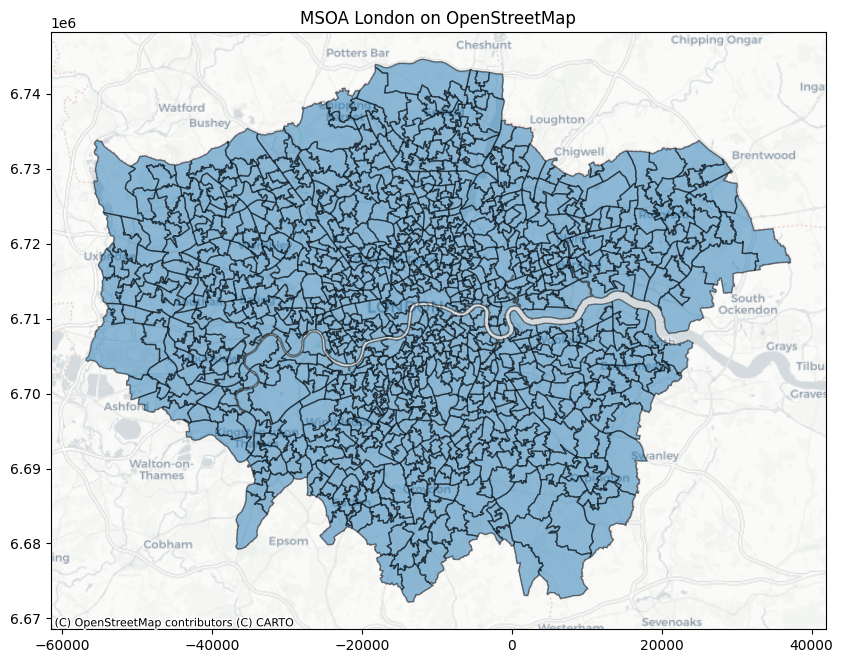

In [25]:
msoa_london = msoa_london.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10, 10))
msoa_london.plot(ax=ax, alpha=0.5, edgecolor='k')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title('MSOA London on OpenStreetMap')
plt.show()

In [7]:
df_collison_2023.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2023010419171,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2023010419183,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2023010419189,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2023010419191,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2023010419192,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1


In [8]:
df_collison_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104258 entries, 0 to 104257
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               104258 non-null  object 
 1   accident_year                                104258 non-null  int64  
 2   accident_reference                           104258 non-null  object 
 3   location_easting_osgr                        104246 non-null  float64
 4   location_northing_osgr                       104246 non-null  float64
 5   longitude                                    104246 non-null  float64
 6   latitude                                     104246 non-null  float64
 7   police_force                                 104258 non-null  int64  
 8   accident_severity                            104258 non-null  int64  
 9   number_of_vehicles                           104258 non-nul

In [9]:
columns_to_use = ['accident_index', 'accident_year', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'time','day_of_week', 'longitude', 'latitude']    
df_collison_2023 = df_collison_2023[columns_to_use]
df_collison_2023.head(5)

,accident_index,accident_year,accident_severity,number_of_vehicles,number_of_casualties,date,time,day_of_week,longitude,latitude
0,2023010419171,2023,3,1,1,01/01/2023,01:24,1,-0.202878,51.418974
1,2023010419183,2023,3,3,2,01/01/2023,02:25,1,-0.042464,51.671155
2,2023010419189,2023,3,2,1,01/01/2023,03:50,1,-0.435789,51.487777
3,2023010419191,2023,3,2,1,01/01/2023,02:13,1,-0.263972,51.597575
4,2023010419192,2023,3,2,1,01/01/2023,01:42,1,-0.168976,51.477324


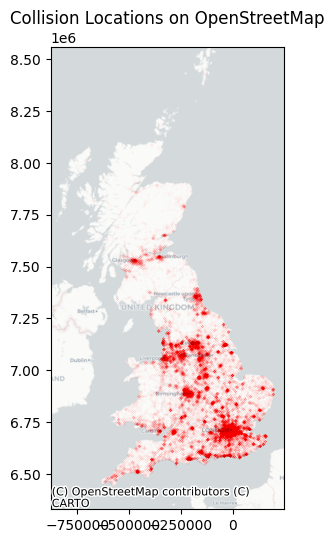

In [23]:
geometry = [Point(xy) for xy in zip(df_collison_2023['longitude'], df_collison_2023['latitude'])]
gdf = gpd.GeoDataFrame(df_collison_2023, geometry=geometry, crs="EPSG:4326")

gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, color='red', markersize=0.01, alpha=0.1)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title('Collision Locations on OpenStreetMap')
plt.show()

In [34]:
# create a GeoDataFrame for df_collison_2023
geometry = [Point(xy) for xy in zip(df_collison_2023['longitude'], df_collison_2023['latitude'])]
gdf_collison = gpd.GeoDataFrame(df_collison_2023, geometry=geometry, crs="EPSG:4326")

# change to the same CRS
gdf_collison = gdf_collison.to_crs(epsg=3857)
msoa_london = msoa_london.to_crs(epsg=3857)

# spatial join
collisions_in_msoa = gpd.sjoin(gdf_collison, msoa_london, how="inner", predicate='intersects')

# keep the columns of gdf_collison and choose the columns of msoa_london I want to keep
columns_to_keep = gdf_collison.columns.tolist() + ['MSOA11CD', 'LAD11CD', 'LAD11NM']
selected_columns = collisions_in_msoa[columns_to_keep]

# 查看結果
print(selected_columns.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 22884 entries, 0 to 87867
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   accident_index        22884 non-null  object  
 1   accident_year         22884 non-null  int64   
 2   accident_severity     22884 non-null  int64   
 3   number_of_vehicles    22884 non-null  int64   
 4   number_of_casualties  22884 non-null  int64   
 5   date                  22884 non-null  object  
 6   time                  22884 non-null  object  
 7   day_of_week           22884 non-null  int64   
 8   longitude             22884 non-null  float64 
 9   latitude              22884 non-null  float64 
 10  geometry              22884 non-null  geometry
 11  MSOA11CD              22884 non-null  object  
 12  LAD11CD               22884 non-null  object  
 13  LAD11NM               22884 non-null  object  
dtypes: float64(2), geometry(1), int64(5), object(6)
mem

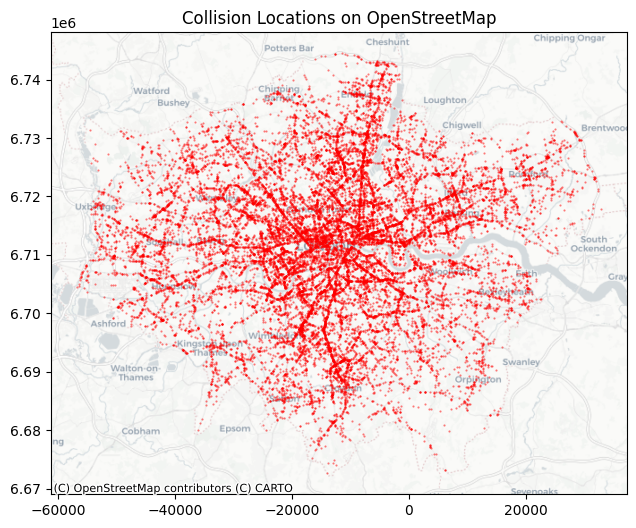

In [28]:
geometry = [Point(xy) for xy in zip(collisions_in_msoa['longitude'], collisions_in_msoa['latitude'])] 
gdf = gpd.GeoDataFrame(collisions_in_msoa, geometry=geometry, crs="EPSG:4326")

gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, color='red', markersize=0.3, alpha=0.5)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title('Collision Locations on OpenStreetMap')
plt.show()